## Using CNN

In [1]:
##Import libraries
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense

Using TensorFlow backend.


In [2]:
## Initialising the CNN
classifier = Sequential()

In [3]:
## Convolution(64 feature detector of dimension 3 by 3), input shape 3 layer for color image)
classifier.add(Conv2D(64,(5,5),input_shape = (64,64,3), activation = 'relu'))
## MaxPooling
classifier.add(MaxPooling2D(pool_size = (2,2)))

## Add another layer
classifier.add(Conv2D(64,(5,5), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2,2)))

## Add another layer
classifier.add(Conv2D(64,(5,5), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2,2)))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.



In [4]:
## Flattening
classifier.add(Flatten())

In [5]:
## Fully connected ANN, Hidden ANN and output layer
classifier.add(Dense(units = 128, activation = 'relu'))

In [6]:
#output layer
classifier.add(Dense(units = 1, activation = 'sigmoid'))

In [7]:
## Compliling
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [8]:
classifier.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 60, 60, 64)        4864      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 30, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 26, 26, 64)        102464    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 9, 9, 64)          102464    
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1024)             

In [9]:
## data importing and transforming and scaling
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255)
                                  #,shear_range=0.2,
                                  #zoom_range=0.2,
                                  #horizontal_flip=True)

In [10]:
## Scaling test data
##no  data augmentation
test_datagen = ImageDataGenerator(rescale=1./255)

In [11]:
## Importing training data
train_set = train_datagen.flow_from_directory('C:/Users/Srishti/Desktop/Data Science/Artificial Intelligence/Pizza-case study/train_set',
                                               target_size=(64, 64),
                                               class_mode='binary')

Found 2000 images belonging to 2 classes.


In [12]:
train_set.class_indices

{'Burnt_Pizza': 0, 'Good_Pizza': 1}

In [13]:
#which is cat which is dog?
label_map = (train_set.class_indices)
print(label_map)

{'Burnt_Pizza': 0, 'Good_Pizza': 1}


In [14]:
## Importng test data ##dataset\\test_set
test_set = test_datagen.flow_from_directory('C:/Users/Srishti/Desktop/Data Science/Artificial Intelligence/Pizza-case study/test_set',
                                            target_size=(64, 64),
                                            class_mode='binary')

Found 100 images belonging to 2 classes.


In [15]:
## fitting model to images
classifier.fit_generator(
        train_set,
        epochs=3,
        validation_data=test_set
        )


Epoch 1/3
63/63 [==============================] - 32s 507ms/step - loss: 0.6578 - accuracy: 0.6250 - val_loss: 0.5538 - val_accuracy: 0.6900
Epoch 2/3
63/63 [==============================] - 31s 497ms/step - loss: 0.5788 - accuracy: 0.6850 - val_loss: 0.5857 - val_accuracy: 0.6600
Epoch 3/3
63/63 [==============================] - 31s 499ms/step - loss: 0.5305 - accuracy: 0.7460 - val_loss: 0.5351 - val_accuracy: 0.8000


In [23]:
## prediction of single new data
import numpy as np
from keras.preprocessing import image
test_image= image.load_img('C:/Users/Srishti/Desktop/Data Science/Artificial Intelligence/Pizza-case study/inference/good2.jpg'
                           ,target_size =(64,64))


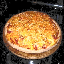

In [24]:
test_image

In [25]:
## Convert image to array
test_image = image.img_to_array(test_image)

In [26]:
## For single prediction change the dimension . 

test_image=test_image.reshape(1,64,64,3)

In [27]:
result = classifier.predict(test_image)

In [28]:
## Class label of with and without helmet

if result == 1:
    prediction = 'Good_Pizza'
else:
    prediction = 'Burnt_Pizza'
    

In [29]:
prediction

'Good_Pizza'